In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from datetime import datetime, timedelta


In [2]:
def visualize_data(df, start_date=None, end_date=None):
    # Filter data based on start and end dates if provided
    if start_date:
        df = df[df['Date'] >= start_date]
    if end_date:
        df = df[df['Date'] <= end_date]
    
    # Calculate 30-day moving average of PR
    df['PR_MA30'] = df['PR'].rolling(window=30).mean()
    
    # Calculate budget line
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Budget_PR'] = 73.9
    for i, row in df.iterrows():
        years_passed = (row['Year'] - 2019) + (row['Month'] - 7) / 12
        if years_passed > 0:
            df.at[i, 'Budget_PR'] = 73.9 * (1 - 0.008) ** np.floor(years_passed)
            # Create the plot
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Plot 30-day moving average
    ax.plot(df['Date'], df['PR_MA30'], color='red', label='30-d Moving Average')
    
    # Plot budget line
    ax.plot(df['Date'], df['Budget_PR'], color='darkgreen', label='Budget PR')
    
    # Create color map for scatter plot
    colors = ['navy', 'lightblue', 'orange', 'brown']
    n_bins = 4
    cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)
    
    # Plot scatter points
    scatter = ax.scatter(df['Date'], df['PR'], c=df['GHI'], cmap=cmap, 
                         vmin=0, vmax=8, s=20, alpha=0.6)
    
    # Customize the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('PR')
    ax.set_title('PR and GHI Over Time')
    
    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('GHI')
    
    # Set x-axis ticks to show dates nicely
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    
    # Add legend
    ax.legend()
    
    # Add text box with statistics
    stats_text = (f"Last 7 days avg: {df['PR'].tail(7).mean():.2f}\n"
                  f"Last 30 days avg: {df['PR'].tail(30).mean():.2f}\n"
                  f"Last 60 days avg: {df['PR'].tail(60).mean():.2f}\n"
                  f"Last 90 days avg: {df['PR'].tail(90).mean():.2f}")
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.05, stats_text, transform=ax.transAxes, fontsize=9,
            verticalalignment='bottom', bbox=props)
    
    # Calculate points above budget
    df['Above_Budget'] = df['PR'] - df['Budget_PR']
    points_above_budget = (df['Above_Budget'] > 0).sum()
    ax.text(0.95, 0.95, f"Points above Budget PR: {points_above_budget}", 
            transform=ax.transAxes, fontsize=9, 
            verticalalignment='top', horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()

In [3]:
def preprocess_data(base_path):
    data = []
    
    for param in ['PR', 'GHI']:
        param_path = os.path.join(base_path, param)
        for month_folder in os.listdir(param_path):
            month_path = os.path.join(param_path, month_folder)
            for file in os.listdir(month_path):
                file_path = os.path.join(month_path, file)
                df = pd.read_csv(file_path)
                df['Date'] = pd.to_datetime(df['Date'])
                df = df.rename(columns={df.columns[1]: param})
                df = df[['Date', param]]  # Keep only Date and the parameter column
                data.append(df)
    
    combined_df = pd.concat(data)
    combined_df = combined_df.sort_values('Date')
    combined_df = combined_df.groupby('Date').first().reset_index()
    
    return combined_df

In [4]:
plt.show()

Processed data saved to: C:\Users\Dell\Desktop\PV\processed_data.csv
Number of rows: 982


Enter start date (YYYY-MM-DD) or press Enter for no start date:  
Enter end date (YYYY-MM-DD) or press Enter for no end date:  


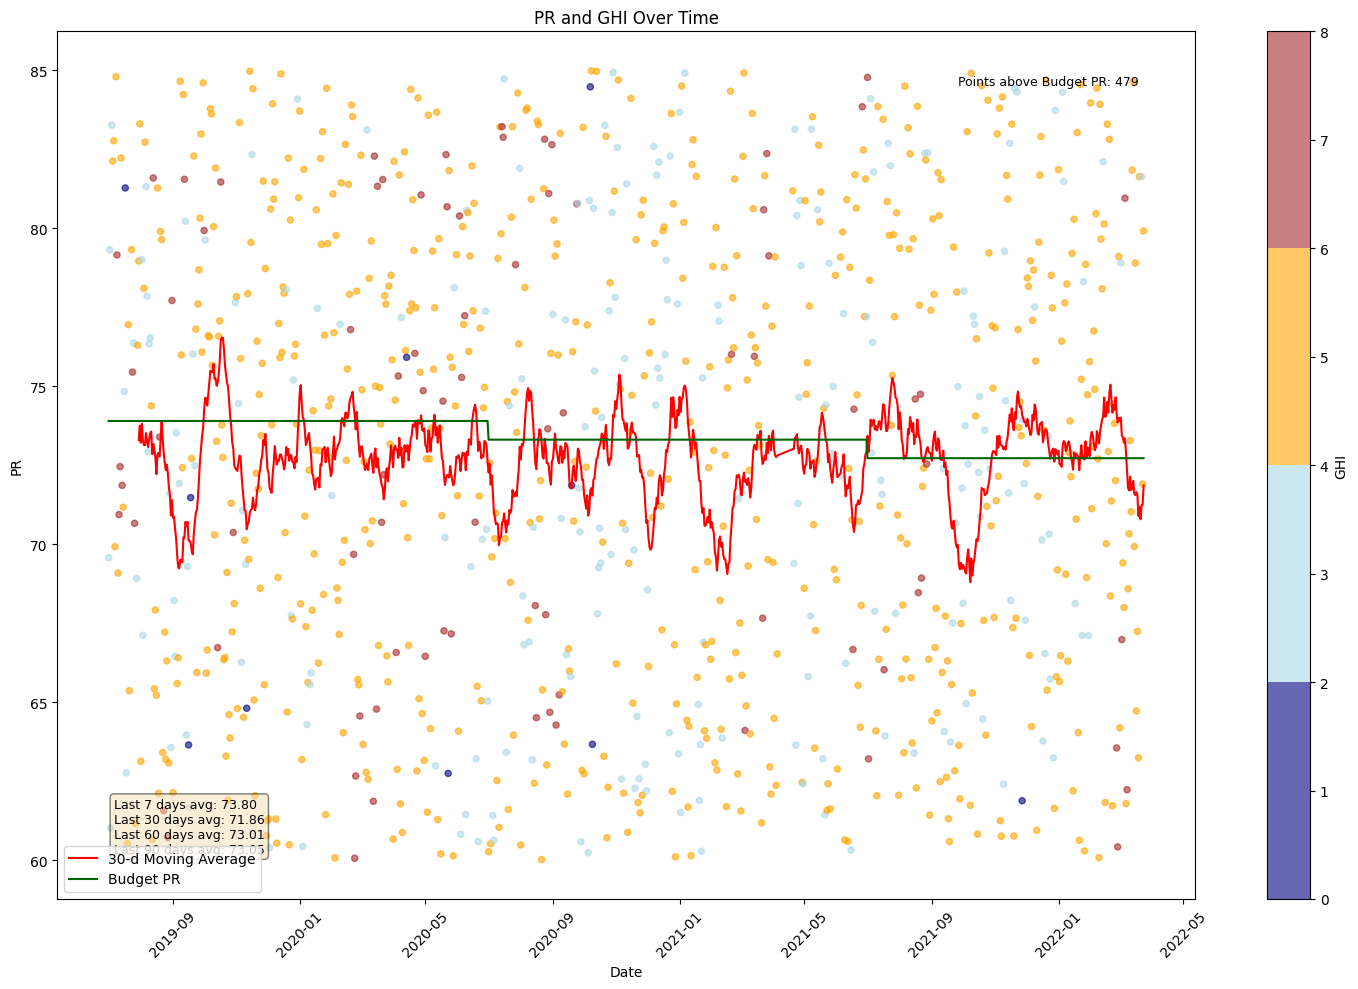

In [5]:
import os
from datetime import datetime

# Set base path
base_path = os.path.join(os.path.expanduser("~"), "Desktop", "PV")

# Preprocess data
processed_data = preprocess_data(base_path)

# Save processed data to CSV
output_path = os.path.join(base_path, "processed_data.csv")
processed_data.to_csv(output_path, index=False)
print(f"Processed data saved to: {output_path}")
print(f"Number of rows: {len(processed_data)}")

# Set default date range or ask for user input
start_date = input("Enter start date (YYYY-MM-DD) or press Enter for no start date: ")
end_date = input("Enter end date (YYYY-MM-DD) or press Enter for no end date: ")

# Convert start and end dates if provided
start_date = datetime.strptime(start_date, '%Y-%m-%d') if start_date else None
end_date = datetime.strptime(end_date, '%Y-%m-%d') if end_date else None

# Visualize data
visualize_data(processed_data, start_date, end_date)

In [6]:
# Saving the processed data to a CSV file
processed_data.to_csv('processed_data.csv', index=False)
